# Credit Card Approval Analysis
### A Data Analysis and Machine Learning Project
#### This project analyses credit card approval data to uncover insights and build predictive models for classification.


### 1. Data Loading and Exploration
#### In this section, we will load the datasets, merge them, and conduct an initial exploration.


In [7]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [8]:
# Load the primary dataset and display the first few rows
data = pd.read_csv("/Credit_card.csv")
data.head()



,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [9]:
# Load the labels dataset, which indicates whether credit applications were approved or rejected
label = pd.read_csv("/Credit_card_label.csv")
label.head()


,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [10]:
# Merge the primary dataset with the labels based on the common column 'Ind_ID' using a left join
data = data.merge(label, on="Ind_ID", how="left")
data.head()



,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [11]:
# Display general information about the dataset
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [12]:
# Show a summary of statistical measures for numerical columns
data.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


 ### 2. Data Cleaning and Analysis
 #### This section focuses on handling missing and duplicate data and exploring patterns in the dataset.


In [13]:
# Check for missing values in each column
data.isna().sum()




,0
Ind_ID,0
GENDER,7
Car_Owner,0
Propert_Owner,0
CHILDREN,0
Annual_income,23
Type_Income,0
EDUCATION,0
Marital_status,0
Housing_type,0


In [14]:
# Drop rows with missing values in 'Annual_income' and 'Birthday_count' only
data = data.dropna(subset=['Annual_income', 'Birthday_count'])



In [15]:
# Verify that missing values have been dropped
data.isna().sum()



,0
Ind_ID,0
GENDER,7
Car_Owner,0
Propert_Owner,0
CHILDREN,0
Annual_income,0
Type_Income,0
EDUCATION,0
Marital_status,0
Housing_type,0


In [16]:
# Check for duplicate rows
data.duplicated().sum()



0

In [17]:
# Calculate and display the average annual income
Average_Income = data["Annual_income"].mean()
print("Average Income:", Average_Income)



Average Income: 191386.54191616765


In [18]:
# Calculate and display the average annual income by gender
Gender_Income = data.groupby("GENDER")["Annual_income"].mean()
print("Average Income by Gender:\n", Gender_Income)



Average Income by Gender:
 GENDER
F    172391.840021
M    222485.245902
Name: Annual_income, dtype: float64


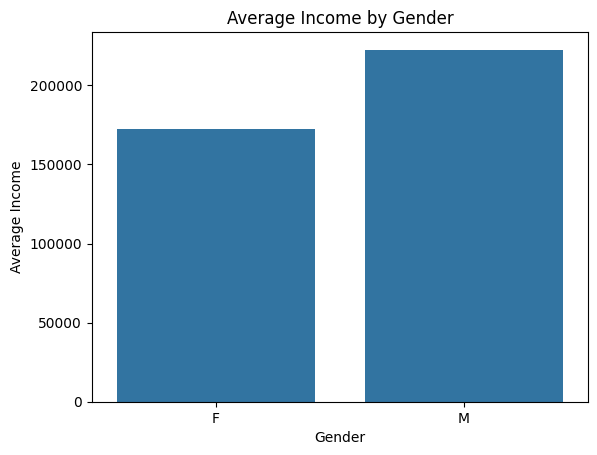

In [19]:
# Visualise the average income by gender using a bar plot
sns.barplot(x=Gender_Income.index, y=Gender_Income.values)
plt.title("Average Income by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Income")
plt.show()



In [20]:
# Count and display the number of approved and rejected credit card applications
Credit_Card_Approval = data["label"].value_counts()
print("Credit Card Approval vs Rejection:\n", Credit_Card_Approval)



Credit Card Approval vs Rejection:
 label
0    1338
1     165
Name: count, dtype: int64


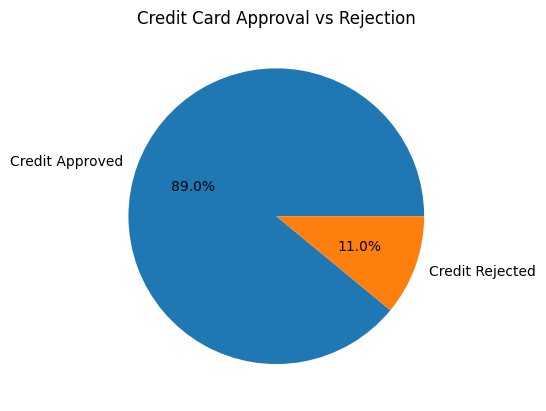

In [21]:
# Plot the proportion of approved vs rejected applications using a pie chart
plt.pie(Credit_Card_Approval, labels=["Credit Approved", "Credit Rejected"], autopct='%1.1f%%')
plt.title("Credit Card Approval vs Rejection")
plt.show()



In [22]:
# Calculate and display various group-level statistics
print("Average Income by Income Type:\n", data.groupby("Type_Income")["Annual_income"].mean())
print("Max Employed Days by Marital Status:\n", data.groupby("Marital_status")["Employed_days"].max())
print("Total Family Members by Housing Type:\n", data.groupby("Housing_type")["Family_Members"].sum())
print("Average Income by Property Ownership:\n", data.groupby("Propert_Owner")["Annual_income"].mean())
print("Total Income by Number of Children:\n", data.groupby("CHILDREN")["Annual_income"].sum())



Average Income by Income Type:
 Type_Income
Commercial associate    233855.084746
Pensioner               155604.982759
State servant           211422.413793
Working                 180999.186528
Name: Annual_income, dtype: float64
Max Employed Days by Marital Status:
 Marital_status
Civil marriage          365243
Married                 365243
Separated               365243
Single / not married    365243
Widow                   365243
Name: Employed_days, dtype: int64
Total Family Members by Housing Type:
 Housing_type
Co-op apartment           5
House / apartment      2913
Municipal apartment      92
Office apartment         21
Rented apartment         46
With parents            176
Name: Family_Members, dtype: int64
Average Income by Property Ownership:
 Propert_Owner
N    184573.996176
Y    195022.216837
Name: Annual_income, dtype: float64
Total Income by Number of Children:
 CHILDREN
0     193057672.5
1      65118600.0
2      26226900.0
3       2845800.0
4        180000.0
14      

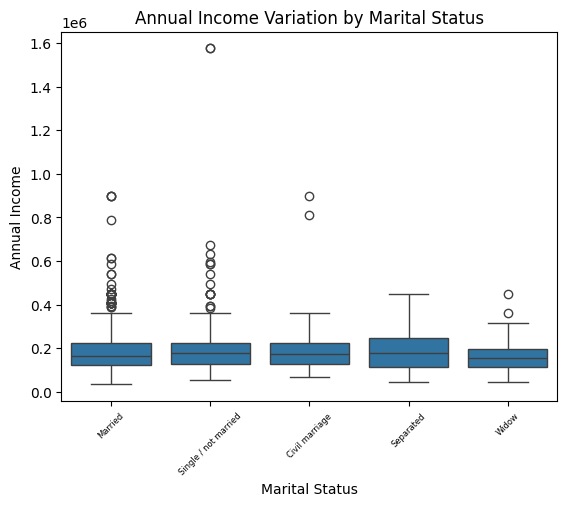

In [23]:
# Visualise the variation in annual income by marital status using a box plot
sns.boxplot(x="Marital_status", y="Annual_income", data=data)
plt.title("Annual Income Variation by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Annual Income")
plt.xticks(rotation=45, fontsize=6)
plt.show()



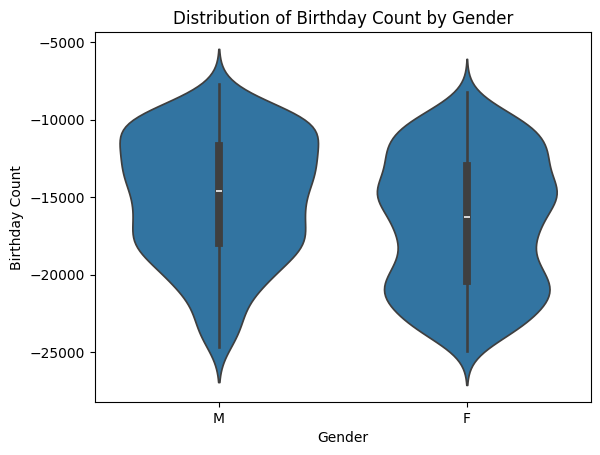

In [24]:
# Create a violin plot to show the distribution of 'Birthday_count' by gender
sns.violinplot(x="GENDER", y="Birthday_count", data=data)
plt.title("Distribution of Birthday Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Birthday Count")
plt.show()



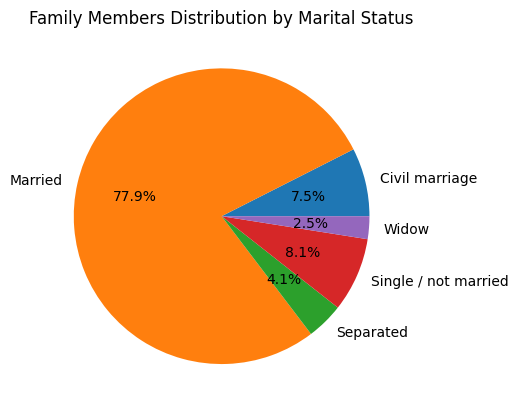

In [25]:
# Plot the distribution of family members by marital status using a pie chart
data.groupby("Marital_status")["Family_Members"].sum().plot(kind="pie", autopct="%1.1f%%")
plt.title("Family Members Distribution by Marital Status")
plt.ylabel("")
plt.show()



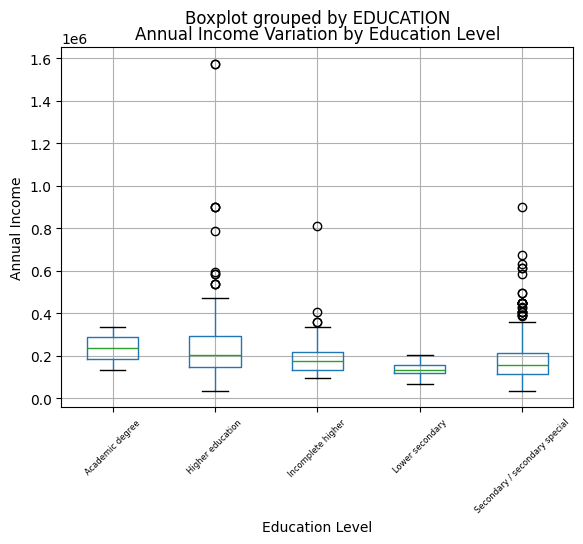

In [26]:
# Create a box plot to visualise annual income variation by education level
data.boxplot(column="Annual_income", by="EDUCATION")
plt.title("Annual Income Variation by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Annual Income")
plt.xticks(rotation=45, fontsize=6)
plt.show()

### 3. Feature Engineering
#### Selecting key features and encoding categorical variables for machine learning models.


In [27]:
# Select specific features for machine learning
data = data[["Annual_income", "Car_Owner", "Propert_Owner", "EDUCATION", "label"]]
data.head()




,Annual_income,Car_Owner,Propert_Owner,EDUCATION,label
0,180000.0,Y,Y,Higher education,1
1,315000.0,Y,N,Higher education,1
4,315000.0,Y,N,Higher education,1
5,315000.0,Y,N,Higher education,1
6,315000.0,Y,N,Higher education,1


In [28]:
# Encode categorical features into numeric values for compatibility with machine learning models
labelencoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = labelencoder.fit_transform(data[column])



In [29]:
# Define features (X) and target labels (y)
X = data[["Annual_income", "Car_Owner", "Propert_Owner", "EDUCATION"]]
y = data["label"]



In [30]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



In [31]:
# Scale the feature data for consistency
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### 4. Machine Learning Models
#### Building and evaluating various classification models to predict credit card approval status.


In [32]:
# Define a function to calculate and display the accuracy score
def modelperformance(predictions):
    print("Accuracy Score:", accuracy_score(y_test, predictions))




In [33]:
# Train a Logistic Regression model and evaluate its accuracy
lr = LogisticRegression()
lr.fit(scaled_X_train, y_train)
predictions = lr.predict(scaled_X_test)
modelperformance(predictions)



Accuracy Score: 0.867109634551495


In [34]:
# Perform hyperparameter tuning for KNN using GridSearchCV
param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11], "weights": ["uniform", "distance"], "algorithm": ["auto", "kd_tree"]}
knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5)
grid_search_knn.fit(scaled_X_train, y_train)
print("Best Parameters for KNN:", grid_search_knn.best_params_)
knn_predictions = grid_search_knn.predict(scaled_X_test)
modelperformance(knn_predictions)



Best Parameters for KNN: {'algorithm': 'auto', 'n_neighbors': 11, 'weights': 'uniform'}
Accuracy Score: 0.867109634551495


In [35]:
# Perform hyperparameter tuning for SVM using GridSearchCV
param_grid_svm = {'C': [0.01, 0.1, 0.5, 1], 'kernel': ["linear", "rbf", "poly"]}
svm = SVC()
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5)
grid_search_svm.fit(scaled_X_train, y_train)
svm_predictions = grid_search_svm.predict(scaled_X_test)
modelperformance(svm_predictions)



Accuracy Score: 0.867109634551495


In [36]:
# Perform hyperparameter tuning for Decision Tree using GridSearchCV
param_grid_dt = {'max_depth': [None, 10, 20, 30, 40, 50], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], "splitter": ["best", "random"], "criterion": ["gini", "entropy"]}
dt = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5)
grid_search_dt.fit(scaled_X_train, y_train)
print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)
dt_predictions = grid_search_dt.predict(scaled_X_test)
modelperformance(dt_predictions)



Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 40, 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'random'}
Accuracy Score: 0.867109634551495


In [37]:
# Perform hyperparameter tuning for Random Forest using GridSearchCV
param_grid_rf = {'n_estimators': [32, 64, 128, 256], 'max_features': [2, 3, 4], 'bootstrap': [True, False], 'oob_score': [True, False]}
rf = RandomForestClassifier()
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5)
grid_search_rf.fit(scaled_X_train, y_train)
rf_predictions = grid_search_rf.predict(scaled_X_test)
modelperformance(rf_predictions)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
Val

Accuracy Score: 0.840531561461794


# Author
#### **Toyosi Kehinde**
